<a href="https://colab.research.google.com/github/1RITIK-ANAND/Salesforce-Developer-Catalyst-Self-Learning-Super-Badges/blob/main/HEALTH_INSURANCE_COST_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Data Collection & Analysis

In [6]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [7]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#insurance_dataset.shape()
#will give total no. of rows and columns
#insurance_datatest.info()

In [9]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Cateogrical Features:
- Sex
- Smoker
- Region

In [10]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [11]:
# statistical MMeasures Of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-12-c147a79d166d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


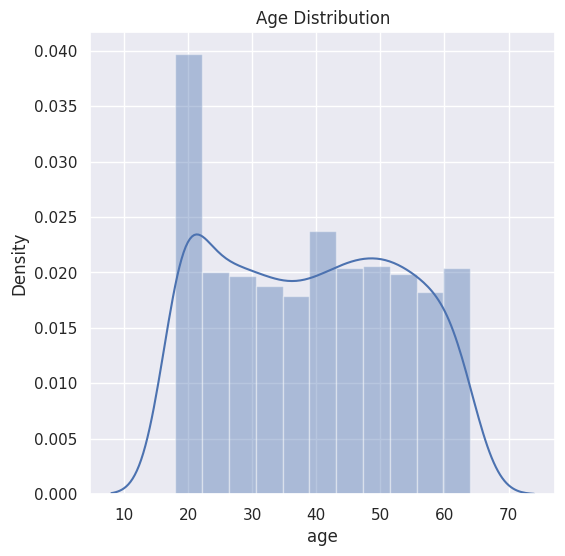

In [12]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

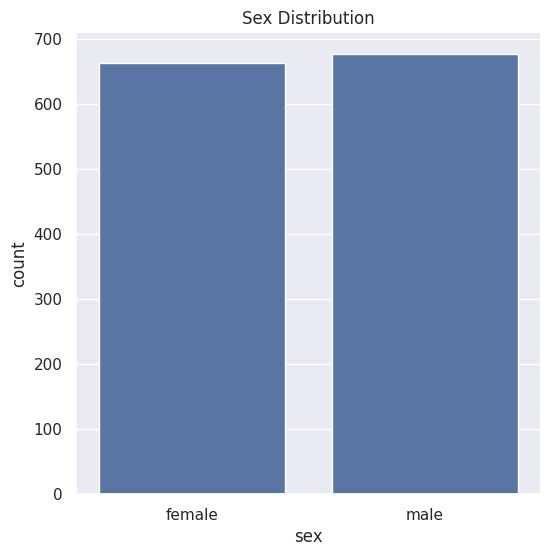

In [13]:
#Gender Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=insurance_dataset, x="sex")
plt.title('Sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-15-21c34197b2dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


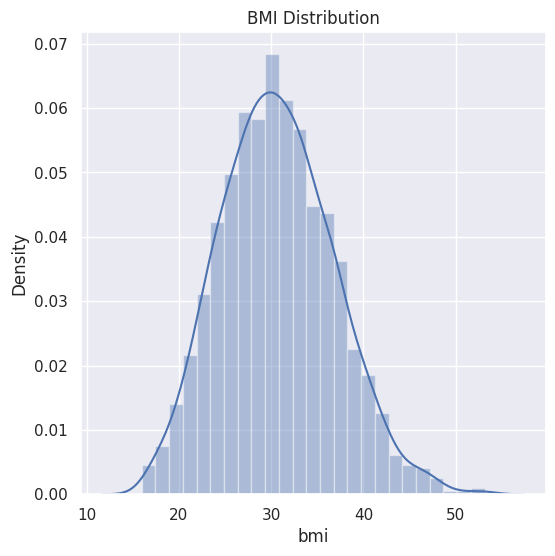

In [15]:
#Bmi Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

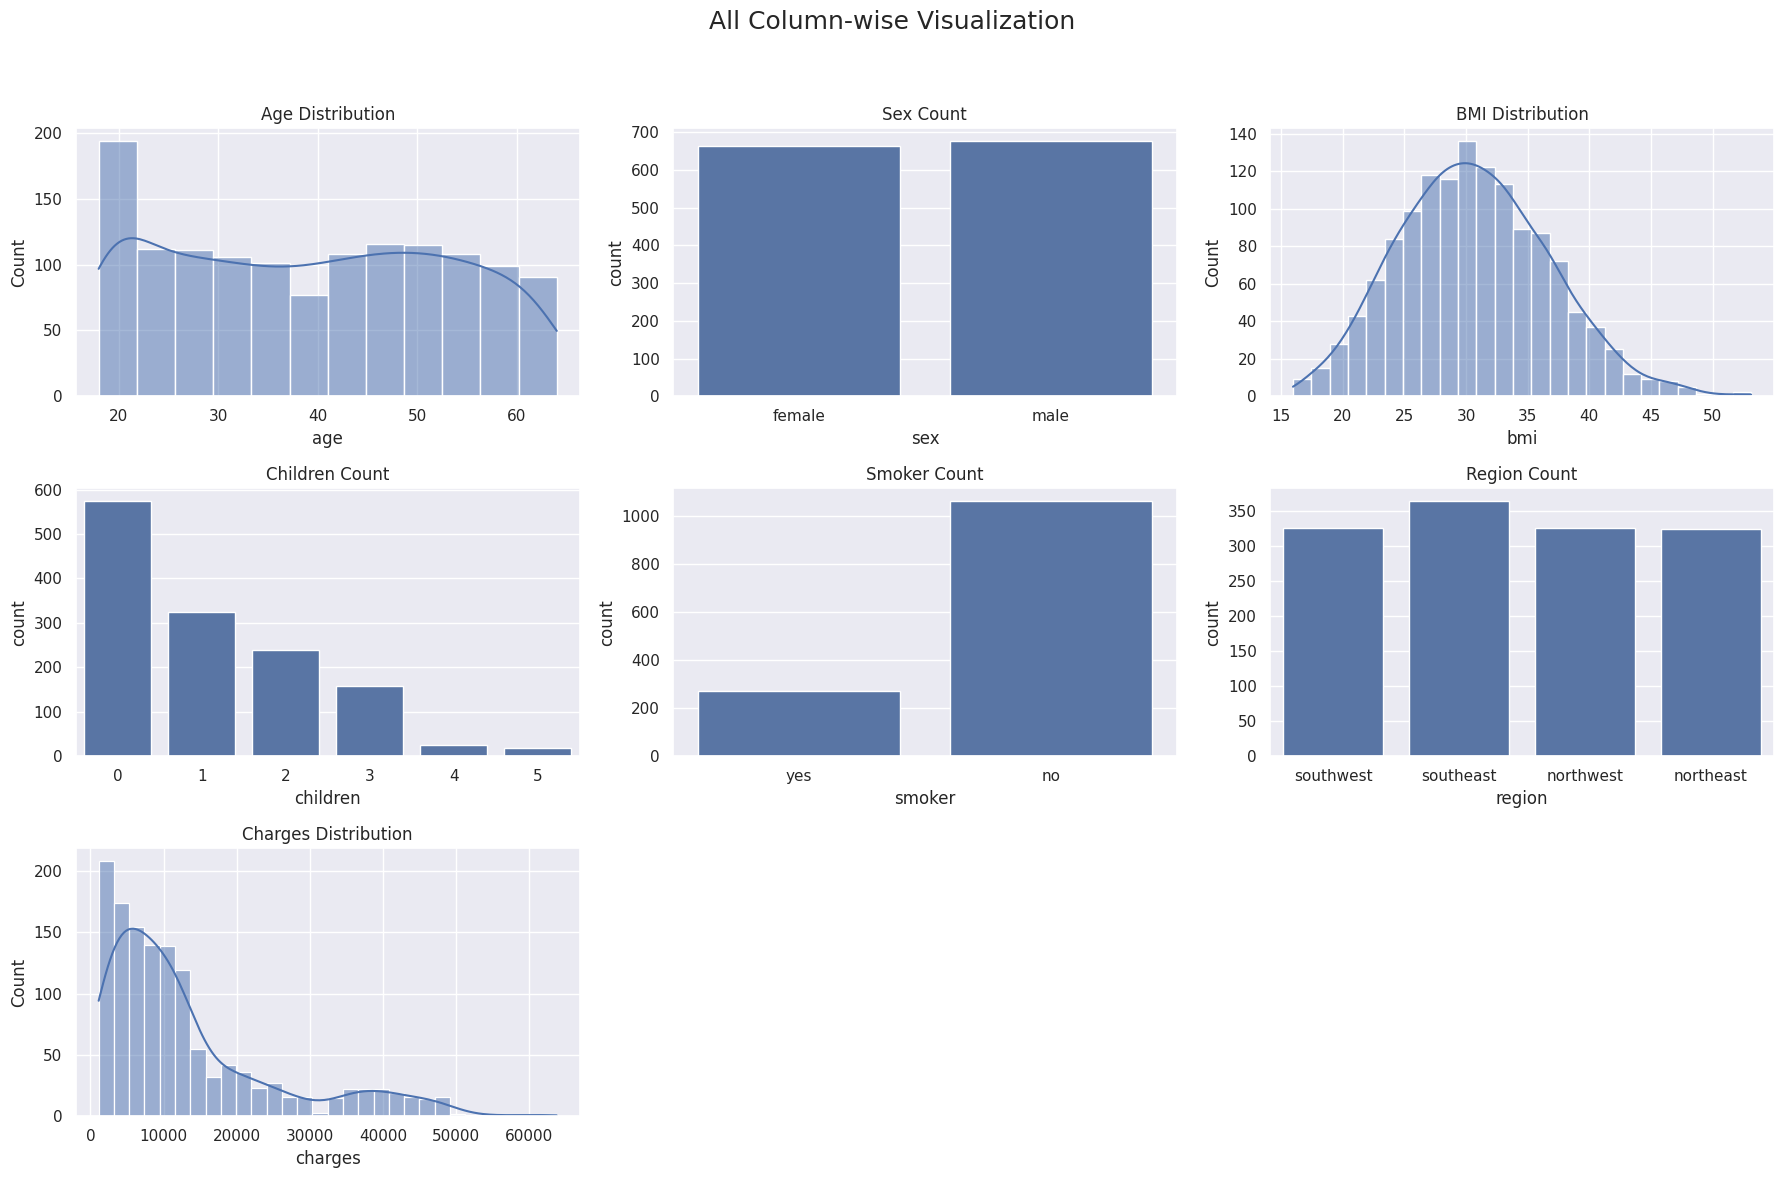

In [16]:


# Setup figure
fig, axs = plt.subplots(3, 3, figsize=(18, 12))  # 3 rows, 3 cols
plt.suptitle("All Column-wise Visualization", fontsize=18)

# Plot 1: Age
sns.histplot(insurance_dataset['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution")

# Plot 2: Sex
sns.countplot(x='sex', data=insurance_dataset, ax=axs[0, 1])
axs[0, 1].set_title("Sex Count")

# Plot 3: BMI
sns.histplot(insurance_dataset['bmi'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title("BMI Distribution")

# Plot 4: Children
sns.countplot(x='children', data=insurance_dataset, ax=axs[1, 0])
axs[1, 0].set_title("Children Count")

# Plot 5: Smoker
sns.countplot(x='smoker', data=insurance_dataset, ax=axs[1, 1])
axs[1, 1].set_title("Smoker Count")

# Plot 6: Region
sns.countplot(x='region', data=insurance_dataset, ax=axs[1, 2])
axs[1, 2].set_title("Region Count")

# Plot 7: Charges
sns.histplot(insurance_dataset['charges'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title("Charges Distribution")

# Hide unused plots (2 remaining slots in 3x3 grid)
axs[2, 1].axis('off')
axs[2, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


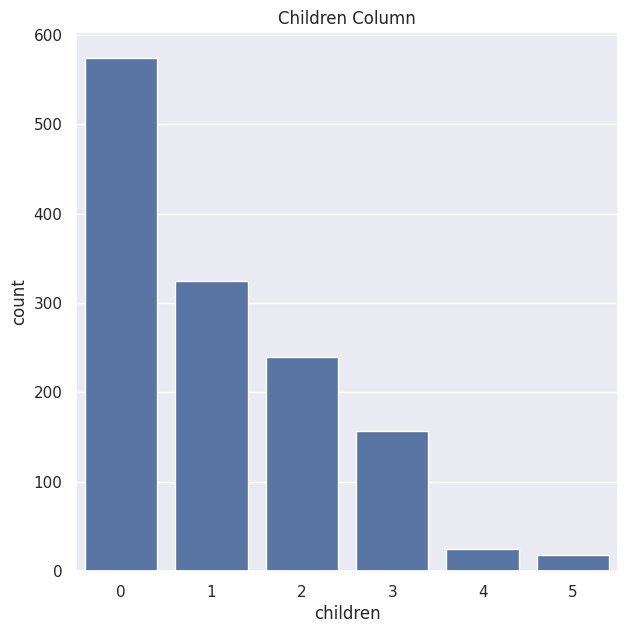

In [17]:
#children column
plt.figure(figsize=(7,7))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Column')
plt.show()

In [18]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


Encoding the categorical features

In [19]:
#encoding sex column
insurance_dataset.replace({"sex":{"male":0, "female":1}}, inplace=True)

#encoding "somker" column
insurance_dataset.replace({"smoker":{"yes":0, "no":1}}, inplace=True)

#encoding "region" column
insurance_dataset.replace({"region":{"southeast":0, "southwest":1, "northeast":2, "northwest":3}}, inplace=True)

<ipython-input-19-2bd2ec63c0d4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"sex":{"male":0, "female":1}}, inplace=True)
<ipython-input-19-2bd2ec63c0d4>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"smoker":{"yes":0, "no":1}}, inplace=True)
<ipython-input-19-2bd2ec63c0d4>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [20]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the feature and target

In [21]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [22]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing data  

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [26]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [30]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [35]:
r2_train= metrics.r2_score(Y_train, training_data_prediction)
print("R squared vale : ", r2_train)

R squared vale :  0.751505643411174


In [36]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [39]:
# R squared value
r2_test= metrics.r2_score(Y_test, test_data_prediction)
print("R squared vale : ", r2_test)

R squared vale :  0.7447273869684076


Predictive System

In [43]:
input_data = (32,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[4011.48569846]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
